### Insta-Bot-2

In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Analyze the habits of food bloggers
1. search food in the search and extract the top 10 handles.
2. from top 10, find the 5 handle from 10 who have highest number of followers.
3. Depict the information using suitable graph.

In [2]:
#opening the browser
driver = webdriver.Chrome()
driver.maximize_window()
#opening Instagram
driver.get("https://www.instagram.com/")

wait = WebDriverWait(driver, 10)
#To handle Cookie Page Popup
cookie_button=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
cookie_button.click()

#update your username and password here
username = 'atharvarhatekar@gmail.com'
password = 'hatekaratharva'

In [3]:
def LogIn(username, password):
    try :
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys(username)
        #locating password box and sending password
        pwd = driver.find_element('name','password')
        pwd.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/section/main/div/div/div/div/div')))
        pop.click()
        #Turn on Notification? : Not Now
        pop2 = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[3]/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]')))
        pop2.click()
        
    except TimeoutException :
        print ("Check is login successful or not?")

In [4]:
#Login to your Instagram Handle
LogIn(username, password)

In [5]:
def search(toSearch):
    account_names=[]
    #Finding search field
    search_field = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div')))
    search_field.click()
    #Find the search box and sending the search query
    search_box = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input')))
    search_box.send_keys({toSearch})
    time.sleep(5)
    html_data = driver.page_source
    soup=BeautifulSoup(html_data,"lxml")
    content=soup.find('div',{'class':'x6s0dn4 x78zum5 xdt5ytf x5yr21d x1odjw0f x1n2onr6 xh8yej3'})

    all_span=content.find_all('span',{'class':'x1lliihq x1plvlek xryxfnj x1n2onr6 x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj'})
    for name in all_span:
        if name.string[0]!="#":
            account_names.append(name.string)

    pop_search=driver.find_element('xpath','/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/div[2]')
    pop_search.click()
    
    return account_names

In [6]:
top_10_usernames=[]
toSearch='food'
names=search(toSearch)
for name in names[:11]:
    if name=='food':
        continue
    top_10_usernames.append(name)

In [7]:
top_10_usernames

['leipzigfoodguide',
 'dresdenfoodguide',
 'junkfoodguru',
 'food8family',
 'foodboom',
 'foodtalkindia',
 'foodfusionpk',
 'streetfoodfactoryherzgebirge',
 'leipzig.foodstories',
 'foodpharmer']

In [8]:
def open_profile(handle_name):
    #Search field find and clicked
    search_field = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div')))
    search_field.click()
    #given account handle searched in searchbox
    search_box = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input')))
    search_box.send_keys({handle_name})
    time.sleep(2)
    #Handle name searching and opening
    id= wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[3]/div/a[1]/div[1]/div/div/div[2]/div/div/div/span")))
    if id.text == handle_name:
        id.click()
    else:
        return f"The Account {handle_name} is not visible."
    
    return f"The Profile {handle_name} has been searched successful"

In [9]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(top_10_usernames):
    try:
        #dct contains username with number of followers
        dct={}
        for i in top_10_usernames:
            #This function will search a user and open that profile
            open_profile(i)
            time.sleep(3)
            #locating followers of user
            followers= wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_ac2a')))[1]
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))

        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) :
                break

        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")


In [12]:
top_handles = top_5_handles(top_10_usernames)

In [13]:

print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])


Top 5 instagram handles which have the highest number of followers :
foodfusionpk -> 1992425
foodpharmer -> 1821078
foodtalkindia -> 308664
foodboom -> 210122
junkfoodguru -> 174861


In [14]:
#I am making this list to make sure that the handles didn't pin there old posts at top.
handles_for_count_posts=["foodtalkindia","foodboom","junkfoodguru","food8family","dresdenfoodguide"]

##### 2.Finding the number of posts these handles have done in the previous 3 days.

In [15]:
def count_of_post(day):
    try:
    #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        post.click()
        count = 0
        while count<=day:
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'x1p4m5qa')))
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            if (datetime.now() - date).days > day:
                break
            else :
                count += 1
            #locating next button
            next_but = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_abm0")))
            if len(next_but)==3:
                next_but[0].click()
            else:
                next_but[1].click()
        
        time.sleep(2)
        #closing the post
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,"x1eu8d0j"))).click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")


In [18]:
total_post_count = {}
for i in handles_for_count_posts:
    open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count


In [19]:
for i in total_post_count:
    print(i,total_post_count[i])

foodtalkindia 4
foodboom 3
junkfoodguru 4
food8family 3
dresdenfoodguide 0


##### 3.Depict this information using a suitable graph.

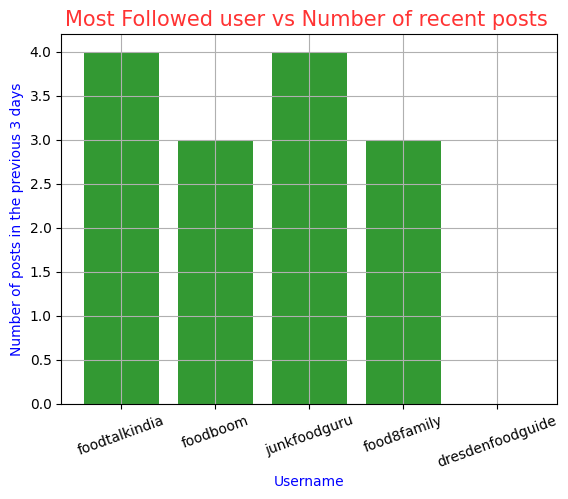

In [20]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.8)
plt.ylabel("Number of posts in the previous 3 days",size=10,color='Blue')
plt.xlabel("Username",size=10, color='Blue')
plt.title('Most Followed user vs Number of recent posts ',fontsize=15, color='red',alpha=0.8)
plt.xticks(rotation=20)
plt.grid()
plt.show()

### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.  
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.  
3.Create a csv file with two columns : the word and its frequency  
4.Now, find the hashtags that were most popular among these bloggers  
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.  

In [21]:
def extract_content(lst):
    try:
        
        hashtags_list = []
        for user in lst:
            #This function will search a user and open that profile
            open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000)')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000)')
            time.sleep(2)


            #locating the post of the user
            posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagu")))
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                caption=driver.find_elements(By.CLASS_NAME,"_a9zs")[0].text
                tags = [tag.strip("#") for tag in caption.split() if tag.startswith("#")]
                hashtags_list.extend(tags)

                #closing the post
                wait.until(EC.presence_of_element_located((By.CLASS_NAME,"x1eu8d0j"))).click()
                time.sleep(2)

        return hashtags_list
    except TimeoutException:
        print ("Something went wrong! Try Again")

In [274]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

In [278]:
len(hashtags)


341

##### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [279]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])


wearefood 10
foodboom 10
spartipps 10
alleinerziehend 9
lifehacks 7
sparen 7
foodandfamily 7
broke 7
einfachesrezept 6
lowbudget 6
essen 6
brokefood 6
lowbudgetfood 6
essenmachtglücklich 6
foodforfoodies 6
goodfood 6
lecker 6
food 5
sparenlernen 5
sparenmitkopf 5
armaberkreativ 4
brokeseinlernen 4
megalecker 4
brokegerichte 4
pleiteaberglücklich 4
niemehrhungrig 4
foodtrends 4
backen 3
aldi 3
neu 3
newintown 2
MadeWithJack 2
eis 2
klassikermithannes 2
fingerfood 2
kokos 2
kleinergeldbeutel 2
foodporn 2
schnellundeinfach 2
singlemomlife 2
familie 2
schnellkochen 2
veggie 2
vegan 2
brokevegan 2
günstigkochen 2
TheClumsies 1
BarTakeover 1
ThingsToDo 1
FoodTalkIndia 1
JackDaniels 1
MakeItCount 1
carrotcake 1
karottenkuchen 1
backrezepte 1
kuchenrezepte 1
dessert 1
trend 1
icecreamandoliveoil 1
foodtrend 1
macncheese 1
macncheeseburger 1
burgerrezept 1
foodboomcampuslife 1
danke 1
fantakuchen 1
einfachebacken 1
kuchen 1
kartoffelgratin 1
kartoffelgerichte 1
käse 1
schnellesrezept 1
rezeptid

##### 3.Create a csv file with two columns : the word and its frequency

In [282]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,wearefood,10
1,foodboom,10
2,spartipps,10
3,alleinerziehend,9
4,lifehacks,7
5,sparen,7
6,foodandfamily,7
7,broke,7
8,einfachesrezept,6
9,lowbudget,6


##### 4.Now, find the hashtags that were most popular among these bloggers

In [284]:
print("#" + words_list[0][0])

#wearefood


##### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

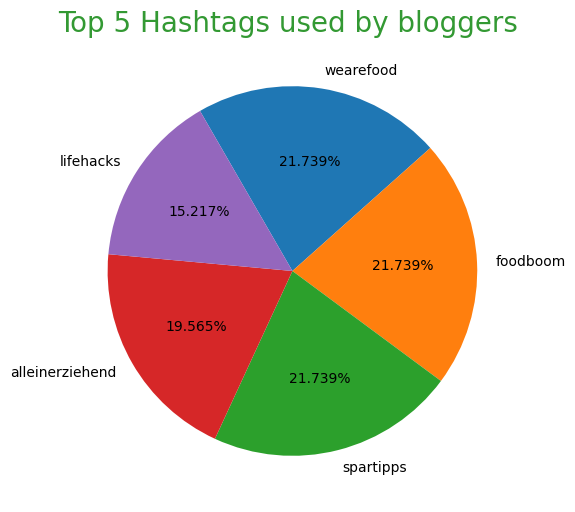

In [295]:
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.3f%%',radius=1,counterclock=False,startangle=120)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:  
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.  
2.Calculate the average likes for a handle.  
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.  
4.Create a bar graph to depict the above obtained information.  

In [55]:
def get_likes(user):
    try :
        likes = []
        #This function will search a user and open that profile
        open_profile(user)
        time.sleep(2)
        #just for scrolling to getting post
        driver.execute_script('window.scrollTo(0, 3000)')
        time.sleep(2)
        driver.execute_script('window.scrollTo(0, -3000)')
        time.sleep(2)
        posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagu")))
        for post in posts[:10]:
            post.click()
            time.sleep(2)
            #Finding total likes in the particular post
            no_of_likes = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/span/a/span/span')))
            no_of_likes = (no_of_likes.text).replace(',' , '')
            likes.append(int(no_of_likes))
            #locating close button and clicking on it
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,"x1eu8d0j"))).click()
            time.sleep(1)
        return likes
    except TimeoutException :
        print ("Something went wrong! Try Again")    

In [ ]:
#dct will store username with list of likes
dct = {}

In [63]:
all_likes= get_likes('dresdenfoodguide')
dct["dresdenfoodguide"] = all_likes

In [67]:
for user,likes in dct.items():
    print(f"{user}: ",end=' ')
    for like in likes:
        print(like,end=" ")
    print()

foodtalkindia:  77 164 374 148 115 148 200 253 353 148 
foodboom:  1001 536 2532 11991 11255 6056 1706 12715 687 1034 
junkfoodguru:  4475 3647 3505 5053 4980 3589 6016 5871 5710 3290 
foodpharmer:  157569 633918 856481 113581 151498 137378 69969 854319 97349 498376 
dresdenfoodguide:  184 63 22 185 40 42 68 176 54 38 


##### 2.Calculate the average likes for a handle.

In [96]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(dct):
    avg_likes = {}
    for key,val in dct.items():
            avg = sum(val) //10
            avg_likes[key] = avg
    return avg_likes

In [97]:
handles_avg_likes={}

avg_likes = get_avg_likes(dct)
print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    handles_avg_likes[user]=likes
    print(user, ':', likes)

Average likes for each handle are :
foodtalkindia : 198
foodboom : 4951
junkfoodguru : 4613
foodpharmer : 357043
dresdenfoodguide : 87


##### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [73]:
handles = list(handles_avg_likes.keys())

['foodtalkindia',
 'foodboom',
 'junkfoodguru',
 'foodpharmer',
 'dresdenfoodguide']

In [75]:
#I am using top_5_handles functions to extract the total followers of the required usernames
followers_count=top_5_handles(handles)

In [81]:
print('Average followers:like ratio of each handle :')
ratio={}
for key,value in followers_count.items():
    for k,v in handles_avg_likes.items():
        if key==k:
            ratio[key]= value//v

for key,value in ratio.items():
    print(f"{key} : {value}")


Average followers:like ratio of each handle :
foodpharmer : 5
foodtalkindia : 1558
foodboom : 42
junkfoodguru : 37
dresdenfoodguide : 61


##### 4.Create a bar graph to depict the above obtained information.

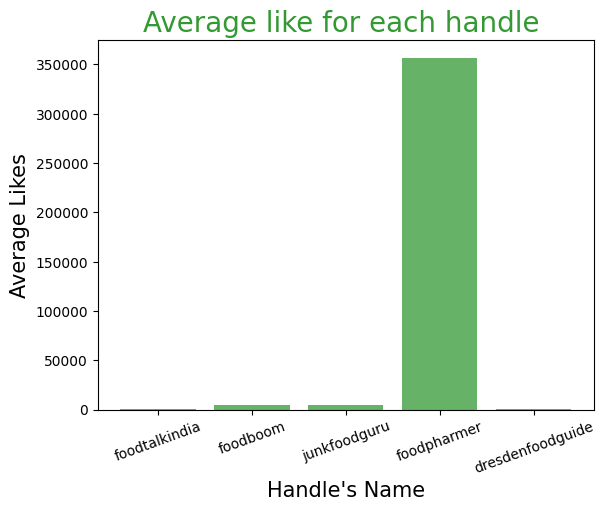

In [99]:
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())
plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=20)
# plt.grid()
plt.show()

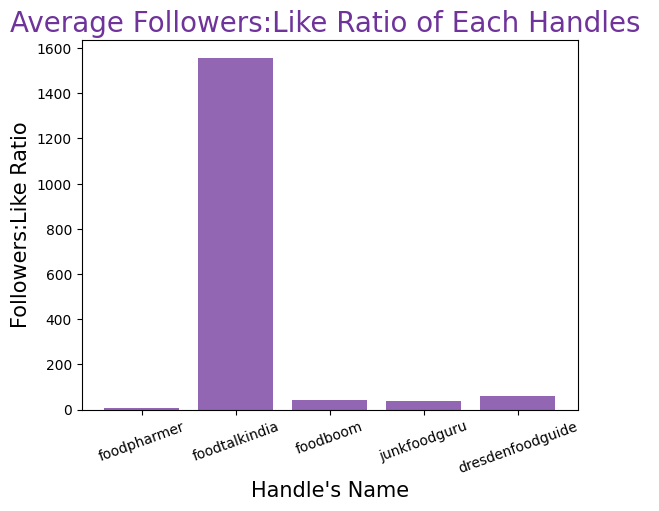

In [100]:
username = list(ratio.keys())
avg_like = list(ratio.values())
plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Followers:Like Ratio",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average Followers:Like Ratio of Each Handles ',fontsize=20, color='Indigo',alpha=0.8)
plt.xticks(rotation=20)
# plt.grid()
plt.show()

In [101]:
driver.close()